In [60]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

!pip install geocoder

#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
!pip install geopy
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
!pip install folium
import folium # map rendering library

print('Libraries imported.')

Libraries imported.


In [61]:
!pip install lxml

In [62]:
!pip install html5lib

In [63]:
!pip install bs4

In [115]:
#url = 'https://opendata.dc.gov/datasets/neighborhood-labels/data'
import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_bec64123fb944822a7897cc29b000f41 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='qdglW-u176sdBLsKEEzgCLTPM5pfTRpXbvHpBoMfgCAI',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
                                                           
                                                           
    endpoint_url='https://s3-api.us-geo.objectstorage.service.networklayer.com')

body = client_bec64123fb944822a7897cc29b000f41.get_object(Bucket='applieddatasciencecapstone-donotdelete-pr-m4i3mkpxjmv6dr',Key='WashingtonDC_Neighborhood.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_data_1 = pd.read_csv(body)
df_data_1.head()


X          Y  OBJECTID     GIS_ID                   NAME  \
0 -76.980348  38.855658         1  nhood_050           Fort Stanton   
1 -76.997950  38.841077         2  nhood_031       Congress Heights   
2 -76.995636  38.830237         3  nhood_123   Washington Highlands   
3 -77.009271  38.826952         4  nhood_008               Bellevue   
4 -76.967660  38.853688         5  nhood_073  Knox Hill/Buena Vista   

                            WEB_URL             LABEL_NAME  \
0  http://NeighborhoodAction.dc.gov           Fort Stanton   
1  http://NeighborhoodAction.dc.gov       Congress Heights   
2  http://NeighborhoodAction.dc.gov   Washington Highlands   
3  http://NeighborhoodAction.dc.gov               Bellevue   
4  http://NeighborhoodAction.dc.gov  Knox Hill/Buena Vista   

         DATELASTMODIFIED  
0  2003/04/10 00:00:00+00  
1  2003/04/10 00:00:00+00  
2  2003/04/10 00:00:00+00  
3  2003/04/10 00:00:00+00  
4  2003/04/10 00:00:00+00

In [116]:
df_data_1.rename(columns={'NAME':'Neighborhood','X':'Longitude', 'Y':'Latitude'}, inplace=True)

In [117]:
df_data_1.head()

Longitude   Latitude  OBJECTID     GIS_ID           Neighborhood  \
0 -76.980348  38.855658         1  nhood_050           Fort Stanton   
1 -76.997950  38.841077         2  nhood_031       Congress Heights   
2 -76.995636  38.830237         3  nhood_123   Washington Highlands   
3 -77.009271  38.826952         4  nhood_008               Bellevue   
4 -76.967660  38.853688         5  nhood_073  Knox Hill/Buena Vista   

                            WEB_URL             LABEL_NAME  \
0  http://NeighborhoodAction.dc.gov           Fort Stanton   
1  http://NeighborhoodAction.dc.gov       Congress Heights   
2  http://NeighborhoodAction.dc.gov   Washington Highlands   
3  http://NeighborhoodAction.dc.gov               Bellevue   
4  http://NeighborhoodAction.dc.gov  Knox Hill/Buena Vista   

         DATELASTMODIFIED  
0  2003/04/10 00:00:00+00  
1  2003/04/10 00:00:00+00  
2  2003/04/10 00:00:00+00  
3  2003/04/10 00:00:00+00  
4  2003/04/10 00:00:00+00

In [118]:
df_data_1.drop(["OBJECTID","GIS_ID","WEB_URL","LABEL_NAME","DATELASTMODIFIED"],axis=1, inplace = True)

In [119]:
df_data_1.head()

Longitude   Latitude           Neighborhood
0 -76.980348  38.855658           Fort Stanton
1 -76.997950  38.841077       Congress Heights
2 -76.995636  38.830237   Washington Highlands
3 -77.009271  38.826952               Bellevue
4 -76.967660  38.853688  Knox Hill/Buena Vista

In [120]:
#I rearranged columns directly by specifying their order:
df_data_1 = df_data_1[['Neighborhood', 'Latitude', 'Longitude']]
df_data_1

Neighborhood   Latitude  Longitude
0                    Fort Stanton  38.855658 -76.980348
1                Congress Heights  38.841077 -76.997950
2            Washington Highlands  38.830237 -76.995636
3                        Bellevue  38.826952 -77.009271
4           Knox Hill/Buena Vista  38.853688 -76.967660
5                         Shipley  38.846860 -76.972902
6                        Douglass  38.847571 -76.979645
7                        Woodland  38.856554 -76.973926
8                Garfield Heights  38.854085 -76.972213
9                  Near Southeast  38.878384 -77.000627
10                   Capitol Hill  38.883621 -76.998477
11                    Dupont Park  38.872630 -76.962818
12                        Twining  38.875588 -76.960847
13               Randle Highlands  38.869336 -76.965804
14                       Fairlawn  38.869159 -76.977452
15                    Penn Branch  38.869560 -76.953424
16                     Barry Farm  38.859255 -76.997281
17             Historic Anacostia  38.863186 -76.984678
18               Columbia Heights  38.928008 -77.030586
19              Logan Circle/Shaw  38.909816 -77.025340
20                   Cardozo/Shaw  38.917168 -77.027550
21                       Van Ness  38.943391 -77.066106
22                   Forest Hills  38.946893 -77.058462
23           Georgetown Reservoir  38.909637 -77.090677
24                Foxhall Village  38.913247 -77.084407
25                    Fort Totten  38.949430 -77.008128
26                  Pleasant Hill  38.941079 -77.004804
27                     Kenilworth  38.910679 -76.938586
28               Eastland Gardens  38.905329 -76.943070
29                       Deanwood  38.904107 -76.932801
30                    Fort Dupont  38.886017 -76.950685
31                       Greenway  38.884788 -76.960181
32           Woodland-Normanstone  38.922850 -77.060753
33             Mass. Ave. Heights  38.925399 -77.070075
34                 Naylor Gardens  38.856724 -76.963046
35                Pleasant Plains  38.929473 -77.023101
36                      Hillsdale  38.858423 -76.990561
37                  Benning Ridge  38.881161 -76.938203
38                   Penn Quarter  38.895370 -77.022181
39                      Chinatown  38.899151 -77.020135
40                     Stronghold  38.925776 -77.007767
41                  South Central  38.923985 -76.965043
42                       Langston  38.901336 -76.972367
43                  Downtown East  38.895428 -77.014234
44           North Portal Estates  38.991765 -77.040877
45               Colonial Village  38.986790 -77.041094
46                  Shepherd Park  38.982980 -77.032126
47                         Takoma  38.976462 -77.021558
48                   Lamond Riggs  38.965070 -77.006445
49                       Petworth  38.943039 -77.024017
50                Brightwood Park  38.955748 -77.024871
51                     Manor Park  38.962062 -77.012657
52                     Brightwood  38.966379 -77.026874
53                      Hawthorne  38.980883 -77.055934
54                  Barnaby Woods  38.975433 -77.060174
55                  Queens Chapel  38.956070 -76.996591
56                  Michigan Park  38.946934 -76.983772
57            North Michigan Park  38.945644 -76.993666
58                      Woodridge  38.934021 -76.968640
59             University Heights  38.938249 -76.995762
60                      Brookland  38.931404 -76.984414
61                       Edgewood  38.925199 -77.000739
62                        Skyland  38.860267 -76.971703
63                   Bloomingdale  38.918226 -77.011159
64                   Lincoln Park  38.887211 -76.989710
65            16th Street Heights  38.950315 -77.033559
66                   Fort Lincoln  38.923610 -76.954749
67                        Gateway  38.919757 -76.963846
68                        Langdon  38.924017 -76.974689
69                      Brentwood  38.918977 -76.987035
70                      Eckington  38.915202 

### Box Plot

In [121]:
# put the latitude and longitude columns of the dataframe into python arrays

Latitude_array = df_data_1[['Latitude']].values
Longitude_array = df_data_1[['Longitude']].values
print(Latitude_array)
print(Longitude_array)

[[38.85565773]
 [38.84107731]
 [38.83023741]
 [38.82695245]
 [38.85368806]
 [38.84686013]
 [38.84757145]
 [38.85655424]
 [38.85408512]
 [38.87838447]
 [38.88362076]
 [38.87263041]
 [38.87558791]
 [38.86933565]
 [38.8691585 ]
 [38.86956018]
 [38.85925526]
 [38.86318571]
 [38.92800829]
 [38.90981631]
 [38.9171683 ]
 [38.94339058]
 [38.94689272]
 [38.90963713]
 [38.91324713]
 [38.94942994]
 [38.94107919]
 [38.91067876]
 [38.9053294 ]
 [38.90410727]
 [38.8860167 ]
 [38.88478751]
 [38.92285   ]
 [38.92539876]
 [38.85672443]
 [38.92947297]
 [38.85842336]
 [38.8811615 ]
 [38.89537045]
 [38.8991512 ]
 [38.92577558]
 [38.92398546]
 [38.90133626]
 [38.89542816]
 [38.99176498]
 [38.98678956]
 [38.98298005]
 [38.9764616 ]
 [38.96506973]
 [38.94303913]
 [38.95574765]
 [38.96206164]
 [38.96637934]
 [38.98088256]
 [38.97543344]
 [38.95607002]
 [38.94693414]
 [38.94564416]
 [38.93402103]
 [38.93824876]
 [38.93140439]
 [38.92519887]
 [38.86026696]
 [38.91822643]
 [38.8872107 ]
 [38.95031455]
 [38.92360

{'whiskers': [<matplotlib.lines.Line2D at 0x7f3fe43284d0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f3fe4328f50>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f3fe46acbd0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f3fe4165a50>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f3fe4165f90>],
 'means': []}

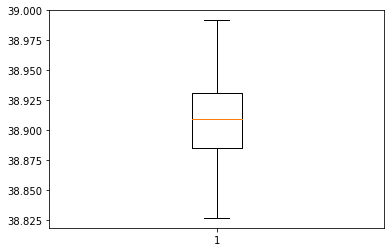

In [166]:
# lets get an idea about the distribution of hte latitude and longitude of the neighborhoods:

import matplotlib.pyplot as plt
%matplotlib inline

plt.boxplot(Latitude_array)



{'whiskers': [<matplotlib.lines.Line2D at 0x7f3fe4808510>,
 'caps': [<matplotlib.lines.Line2D at 0x7f3fe48ca690>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f3fe480e4d0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f3fe488be10>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f3fe4cc7bd0>],
 'means': []}

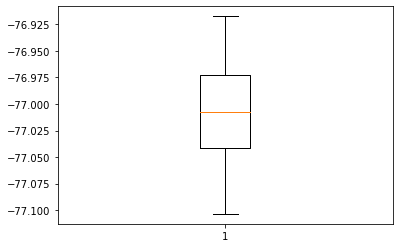

In [167]:
# lets get an idea about the distribution of hte latitude and longitude of the neighborhoods:

import matplotlib.pyplot as plt
%matplotlib inline

plt.boxplot(Longitude_array)


### Histogram

(array([ 3.,  9., 13., 14., 25., 29., 15., 14.,  4.,  6.]),
 array([38.82695245, 38.8434337 , 38.85991496, 38.87639621, 38.89287746,
        38.90935871, 38.92583997, 38.94232122, 38.95880247, 38.97528373,
        38.99176498]),
 <a list of 10 Patch objects>)

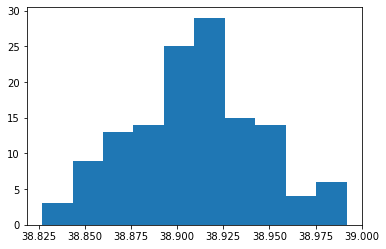

In [168]:
# histogram of the neighborhood's latitudes

plt.hist(Latitude_array)

(array([ 6., 10., 12., 13., 23., 18., 16., 17., 10.,  7.]),
 array([-77.10352038, -77.08490728, -77.06629419, -77.0476811 ,
        -77.029068  , -77.01045491, -76.99184181, -76.97322872,
        -76.95461562, -76.93600253, -76.91738943]),
 <a list of 10 Patch objects>)

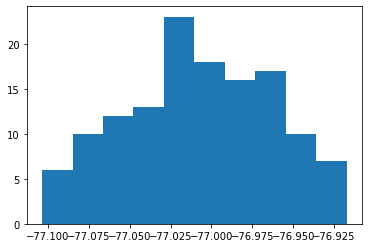

In [169]:
# histogram of the neighborhood's latitudes

plt.hist(Longitude_array)

Histograms were used to distribution of neighborhood concentration.

### Scatter Plot

Text(0, 0.5, 'Latitude')

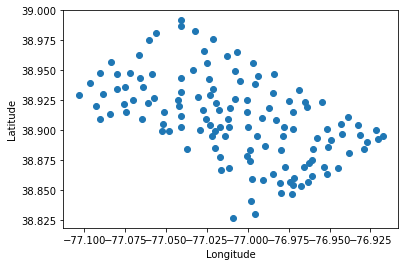

In [170]:
plt.scatter(Longitude_array, Latitude_array)
plt.xlabel('Longitude')
plt.ylabel('Latitude')

In [171]:
df_data_1.shape

(132, 3)

In [128]:
df_data_1.dtypes

Neighborhood     object
Latitude        float64
Longitude       float64
dtype: object

In [129]:
df_data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132 entries, 0 to 131
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Neighborhood  132 non-null    object 
 1   Latitude      132 non-null    float64
 2   Longitude     132 non-null    float64
dtypes: float64(2), object(1)
memory usage: 3.2+ KB


In [130]:
df_data_1.head()

Neighborhood   Latitude  Longitude
0           Fort Stanton  38.855658 -76.980348
1       Congress Heights  38.841077 -76.997950
2   Washington Highlands  38.830237 -76.995636
3               Bellevue  38.826952 -77.009271
4  Knox Hill/Buena Vista  38.853688 -76.967660

In [131]:
address = 'Washington DC, DC'

geolocator = Nominatim(user_agent="DC_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Washington DC, DC are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Washington DC, DC are 38.8949924, -77.0365581.


In [132]:
# create map of Washington_DC using latitude and longitude values
map_Washington_DC = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, neighborhood in zip(df_data_1['Latitude'], df_data_1['Longitude'], df_data_1['Neighborhood']):
    label = '{}, {}'.format(df_data_1, neighborhood)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_Washington_DC)  
    
map_Washington_DC

## Folium is a great visualization library. Feel free to zoom into the above map, and click on each circle mark to reveal the name of the neighborhood.

In [133]:
#Original DataFrame
df_data_1

Neighborhood   Latitude  Longitude
0                    Fort Stanton  38.855658 -76.980348
1                Congress Heights  38.841077 -76.997950
2            Washington Highlands  38.830237 -76.995636
3                        Bellevue  38.826952 -77.009271
4           Knox Hill/Buena Vista  38.853688 -76.967660
5                         Shipley  38.846860 -76.972902
6                        Douglass  38.847571 -76.979645
7                        Woodland  38.856554 -76.973926
8                Garfield Heights  38.854085 -76.972213
9                  Near Southeast  38.878384 -77.000627
10                   Capitol Hill  38.883621 -76.998477
11                    Dupont Park  38.872630 -76.962818
12                        Twining  38.875588 -76.960847
13               Randle Highlands  38.869336 -76.965804
14                       Fairlawn  38.869159 -76.977452
15                    Penn Branch  38.869560 -76.953424
16                     Barry Farm  38.859255 -76.997281
17             Historic Anacostia  38.863186 -76.984678
18               Columbia Heights  38.928008 -77.030586
19              Logan Circle/Shaw  38.909816 -77.025340
20                   Cardozo/Shaw  38.917168 -77.027550
21                       Van Ness  38.943391 -77.066106
22                   Forest Hills  38.946893 -77.058462
23           Georgetown Reservoir  38.909637 -77.090677
24                Foxhall Village  38.913247 -77.084407
25                    Fort Totten  38.949430 -77.008128
26                  Pleasant Hill  38.941079 -77.004804
27                     Kenilworth  38.910679 -76.938586
28               Eastland Gardens  38.905329 -76.943070
29                       Deanwood  38.904107 -76.932801
30                    Fort Dupont  38.886017 -76.950685
31                       Greenway  38.884788 -76.960181
32           Woodland-Normanstone  38.922850 -77.060753
33             Mass. Ave. Heights  38.925399 -77.070075
34                 Naylor Gardens  38.856724 -76.963046
35                Pleasant Plains  38.929473 -77.023101
36                      Hillsdale  38.858423 -76.990561
37                  Benning Ridge  38.881161 -76.938203
38                   Penn Quarter  38.895370 -77.022181
39                      Chinatown  38.899151 -77.020135
40                     Stronghold  38.925776 -77.007767
41                  South Central  38.923985 -76.965043
42                       Langston  38.901336 -76.972367
43                  Downtown East  38.895428 -77.014234
44           North Portal Estates  38.991765 -77.040877
45               Colonial Village  38.986790 -77.041094
46                  Shepherd Park  38.982980 -77.032126
47                         Takoma  38.976462 -77.021558
48                   Lamond Riggs  38.965070 -77.006445
49                       Petworth  38.943039 -77.024017
50                Brightwood Park  38.955748 -77.024871
51                     Manor Park  38.962062 -77.012657
52                     Brightwood  38.966379 -77.026874
53                      Hawthorne  38.980883 -77.055934
54                  Barnaby Woods  38.975433 -77.060174
55                  Queens Chapel  38.956070 -76.996591
56                  Michigan Park  38.946934 -76.983772
57            North Michigan Park  38.945644 -76.993666
58                      Woodridge  38.934021 -76.968640
59             University Heights  38.938249 -76.995762
60                      Brookland  38.931404 -76.984414
61                       Edgewood  38.925199 -77.000739
62                        Skyland  38.860267 -76.971703
63                   Bloomingdale  38.918226 -77.011159
64                   Lincoln Park  38.887211 -76.989710
65            16th Street Heights  38.950315 -77.033559
66                   Fort Lincoln  38.923610 -76.954749
67                        Gateway  38.919757 -76.963846
68                        Langdon  38.924017 -76.974689
69                      Brentwood  38.918977 -76.987035
70                      Eckington  38.915202 

#### Show the first one in the list

In [134]:
df_data_1.loc[0, 'Neighborhood']

'Fort Stanton'

#### we can use below mentioned code to segment Fort Stanton with its long and lat values

In [135]:
neighborhood_latitude = df_data_1.loc[0,'Latitude'] # neighborhood latitude value
neighborhood_longitude = df_data_1.loc[0,'Longitude'] # neighborhood longitude value

neighborhood_name = df_data_1.loc[0,'Neighborhood'] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(neighborhood_name, 
                                                               neighborhood_latitude, 
                                                               neighborhood_longitude))

Latitude and longitude values of Fort Stanton are 38.85565773, -76.98034771.


# Next, we are going to start utilizing the Foursquare API to explore the neighborhoods and segment them. Define Foursquare Credentials and Version


In [136]:
CLIENT_ID = 'YLFCWQ3ZYWMALIKXC43K400R3U4O3CHZ3ASN2STT5HTJBTDY' # your Foursquare ID
CLIENT_SECRET = 'NM5LHBELBNRDKUUEICT3SNP31KECGK3B1BUZ4QVFNBJBCWDC' # your Foursquare Secret
VERSION = '20210211' # Foursquare API version
LIMIT = 100 # A default Foursquare API limit value

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: YLFCWQ3ZYWMALIKXC43K400R3U4O3CHZ3ASN2STT5HTJBTDY
CLIENT_SECRET:NM5LHBELBNRDKUUEICT3SNP31KECGK3B1BUZ4QVFNBJBCWDC


Now, let's get the top 100 venues that are in Fort Stanton within a radius of 500 meters. First, let's create the GET request URL1. Name your URL url1.

First, let's create the GET request URL. Name your URL url.

In [137]:
# type your answer here
LIMIT = 100 # limit of number of venues returned by Foursquare API
radius = 500 # define radius

url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, VERSION, neighborhood_latitude, neighborhood_longitude, radius, LIMIT)
url

'https://api.foursquare.com/v2/venues/explore?&client_id=YLFCWQ3ZYWMALIKXC43K400R3U4O3CHZ3ASN2STT5HTJBTDY&client_secret=NM5LHBELBNRDKUUEICT3SNP31KECGK3B1BUZ4QVFNBJBCWDC&v=20210211&ll=38.85565773,-76.98034771&radius=500&limit=100'

Send the GET request and examine the results

In [138]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '60289c673e9575501bce0df7'},
 'response': {'headerLocation': 'Anacostia',
  'headerFullLocation': 'Anacostia, Washington',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 4,
  'suggestedBounds': {'ne': {'lat': 38.8601577345, 'lng': -76.97457984594331},
   'sw': {'lat': 38.851157725499995, 'lng': -76.9861155740567}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4b4cd6d6f964a52015c126e3',
       'name': 'Anacostia Community Museum',
       'location': {'address': '1901 Fort Pl SE',
        'lat': 38.85672843484337,
        'lng': -76.97689924873403,
        'labeledLatLngs': [{'label': 'display',
          'lat': 38.85672843484337,
          'lng': -76.97689924873403},
         {'label': 'entrance', 'lat': 38.856636, 

As we know that all the information is in the items key. Before we proceed, let's borrow the get_category_type function from the Foursquare lab.

In [139]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

Now we are ready to clean the json and structure it into a pandas dataframe.

In [140]:
def getNearbyVenues(names, latitudes, longitudes, radius=1500):    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name + ' ' + 'latitudes ' + 'longitudes')
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()['response']['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['neighborhood', 
                  'neighborhood latitude', 
                  'neighborhood longitude', 
                  'venue', 
                  'venue latitude', 
                  'venue longitude', 
                  'venue category']
    
    return(nearby_venues)

In [141]:
washingtonDC_venues = getNearbyVenues(names=df_data_1['Neighborhood'],
                                   latitudes=df_data_1['Latitude'],
                                   longitudes=df_data_1['Longitude']
                                  )



Fort Stanton latitudes longitudes
Congress Heights latitudes longitudes
Washington Highlands latitudes longitudes
Bellevue latitudes longitudes
Knox Hill/Buena Vista latitudes longitudes
Shipley latitudes longitudes
Douglass latitudes longitudes
Woodland latitudes longitudes
Garfield Heights latitudes longitudes
Near Southeast latitudes longitudes
Capitol Hill latitudes longitudes
Dupont Park latitudes longitudes
Twining latitudes longitudes
Randle Highlands latitudes longitudes
Fairlawn latitudes longitudes
Penn Branch latitudes longitudes
Barry Farm latitudes longitudes
Historic Anacostia latitudes longitudes
Columbia Heights latitudes longitudes
Logan Circle/Shaw latitudes longitudes
Cardozo/Shaw latitudes longitudes
Van Ness latitudes longitudes
Forest Hills latitudes longitudes
Georgetown Reservoir latitudes longitudes
Foxhall Village latitudes longitudes
Fort Totten latitudes longitudes
Pleasant Hill latitudes longitudes
Kenilworth latitudes longitudes
Eastland Gardens latitudes 

## And how many venues were returned by Foursquare?

In [142]:
print('{} venues were returned by Foursquare.'.format(washingtonDC_venues.shape[0]))

9043 venues were returned by Foursquare.


### Let's check the size of the resulting dataframe

In [143]:
print(washingtonDC_venues.shape)
washingtonDC_venues.head(100)



(9043, 7)


neighborhood  neighborhood latitude  neighborhood longitude  \
0           Fort Stanton              38.855658              -76.980348   
1           Fort Stanton              38.855658              -76.980348   
2           Fort Stanton              38.855658              -76.980348   
3           Fort Stanton              38.855658              -76.980348   
4           Fort Stanton              38.855658              -76.980348   
5           Fort Stanton              38.855658              -76.980348   
6           Fort Stanton              38.855658              -76.980348   
7           Fort Stanton              38.855658              -76.980348   
8           Fort Stanton              38.855658              -76.980348   
9           Fort Stanton              38.855658              -76.980348   
10          Fort Stanton              38.855658              -76.980348   
11          Fort Stanton              38.855658              -76.980348   
12          Fort Stanton              38.855658              -76.980348   
13          Fort Stanton              38.855658              -76.980348   
14          Fort Stanton              38.855658              -76.980348   
15          Fort Stanton              38.855658              -76.980348   
16          Fort Stanton              38.855658              -76.980348   
17          Fort Stanton              38.855658              -76.980348   
18          Fort Stanton              38.855658              -76.980348   
19          Fort Stanton              38.855658              -76.980348   
20          Fort Stanton              38.855658              -76.980348   
21          Fort Stanton              38.855658              -76.980348   
22          Fort Stanton              38.855658              -76.980348   
23          Fort Stanton              38.855658              -76.980348   
24          Fort Stanton              38.855658              -76.980348   
25          Fort Stanton              38.855658              -76.980348   
26          Fort Stanton              38.855658              -76.980348   
27          Fort Stanton              38.855658              -76.980348   
28          Fort Stanton              38.855658              -76.980348   
29          Fort Stanton              38.855658              -76.980348   
30          Fort Stanton              38.855658              -76.980348   
31          Fort Stanton              38.855658              -76.980348   
32          Fort Stanton              38.855658              -76.980348   
33          Fort Stanton              38.855658              -76.980348   
34          Fort Stanton              38.855658              -76.980348   
35          Fort Stanton              38.855658              -76.980348   
36          Fort Stanton              38.855658              -76.980348   
37          Fort Stanton              38.855658              -76.980348   
38          Fort Stanton              38.855658              -76.980348   
39      Congress Heights              38.841077              -76.997950   
40      Congress Heights              38.841077              -76.997950   
41      Congress Heights              38.841077              -76.997950   
42      Congress Heights              38.841077              -76.997950   
43      Congress Heights              38.841077              -76.997950   
44      Congress Heights              38.841077              -76.997950   
45      Congress Heights              38.841077              -76.997950   
46      Congress Heights              38.841077              -76.997950   
47      Congress Heights              38.841077              -76.997950   
48      Congress Heights              38.841077              -76.997950   
49      Congress Heights              38.841077              -76.997950   
50      Congress Heights              38.841077              -76.997950   
51      Congress Heights              38.841077              -76.997950   
52      Congress Heights             

### Let's check how many venues were returned for each neighborhood

In [144]:
washingtonDC_venues.groupby('neighborhood').count()

neighborhood latitude  neighborhood longitude  \
neighborhood                                                                  
16th Street Heights                              75                      75   
Adams Morgan                                    100                     100   
American University Park                         94                      94   
Arboretum                                        55                      55   
Barnaby Woods                                    15                      15   
Barry Farm                                       31                      31   
Bellevue                                         38                      38   
Benning                                          37                      37   
Benning Ridge                                    37                      37   
Bloomingdale                                    100                     100   
Brentwood                                       100                     100   
Brightwood                                       64                      64   
Brightwood Park                                  53                      53   
Brookland                                        72                      72   
Burleith/Hillandale                             100                     100   
Burrville                                        26                      26   
Buzzard Point                                   100                     100   
Capitol Hill                                    100                     100   
Capitol View                                     26                      26   
Cardozo/Shaw                                    100                     100   
Carver                                           95                      95   
Cathedral Heights                                84                      84   
Central NE                                       40                      40   
Chevy Chase                                      38                      38   
Chinatown                                       100                     100   
Cleveland Park                                   71                      71   
Colonial Village                                 58                      58   
Columbia Heights                                100                     100   
Congress Heights                                 27                      27   
Connecticut Avenue/K Street                     100                     100   
Crestwood                                        73                      73   
Deanwood                                         17                      17   
Douglass                                         14                      14   
Downtown                                        100                     100   
Downtown East                                   100                     100   
Dupont Circle                                   100                     100   
Dupont Park                                      41                      41   
Eastland Gardens                                 28                      28   
Eckington                                       100                     100   
Edgewood                                        100                     100   
Fairfax Village                                  28                      28   
Fairlawn                                         55                      55   
Foggy Bottom                                    100                     100   
Forest Hills                                     44                      44   
Fort Davis Park                                  35                      35   
Fort Dupont                                      32                      32   
Fort Lincoln                                     49                      49   
Fort McNair                                     100                     100   
Fort Stanton                                     39                      39   
F

### Let's find out how many unique categories can be curated from all the returned venues

In [145]:
print('There are {} uniques categories.'.format(len(washingtonDC_venues['venue category'].unique())))

There are 342 uniques categories.


### Analyze Each Neighborhood

In [147]:
# one hot encoding
washingtonDC_onehot = pd.get_dummies(washingtonDC_venues[['venue category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
washingtonDC_onehot['name'] = washingtonDC_venues['neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [washingtonDC_onehot.columns[-1]] + list(washingtonDC_onehot.columns[:-1])
washingtonDC_onehot = washingtonDC_onehot[fixed_columns]

washingtonDC_onehot.head()

name  ATM  Afghan Restaurant  African Restaurant  Airport Lounge  \
0  Fort Stanton    0                  0                   0               0   
1  Fort Stanton    0                  0                   0               0   
2  Fort Stanton    0                  0                   0               0   
3  Fort Stanton    0                  0                   0               0   
4  Fort Stanton    0                  0                   0               0   

   American Restaurant  Arcade  Arepa Restaurant  Art Gallery  Art Museum  \
0                    0       0                 0            0           0   
1                    0       0                 0            0           0   
2                    0       0                 0            0           0   
3                    0       0                 0            1           0   
4                    0       0                 0            0           0   

   Arts & Crafts Store  Arts & Entertainment  Asian Restaurant  Astrologer  \
0                    0                     0                 0           0   
1                    0                     0                 0           0   
2                    0                     0                 0           0   
3                    0                     0                 0           0   
4                    0                     0                 0           0   

   Athletics & Sports  Austrian Restaurant  Automotive Shop  BBQ Joint  \
0                   0                    0                0          0   
1                   0                    0                0          0   
2                   0                    0                0          0   
3                   0                    0                0          0   
4                   0                    0                0          0   

   Bagel Shop  Bakery  Bank  Bar  Baseball Field  Baseball Stadium  \
0           0       0     0    0               0                 0   
1           0       0     0    0               0                 0   
2           0       0     0    0               0                 0   
3           0       0     0    0               0                 0   
4           0       0     0    0               0                 0   

   Basketball Court  Basketball Stadium  Beer Bar  Beer Garden  Beer Store  \
0                 0                   0         0            0           0   
1                 0                   0         0            0           0   
2                 0                   0         0            0           0   
3                 0                   0         0            0           0   
4                 0                   0         0            0           0   

   Belgian Restaurant  Big Box Store  Bike Rental / Bike Share  Bike Shop  \
0                   0              0                         0          0   
1                   0              0                         0          0   
2                   0              0                         0          0   
3                   0              0                         0          0   
4                   0              0                         0          0   

   Bike Trail  Bistro  Board Shop  Boarding House  Boat or Ferry  Bookstore  \
0           0       0           0               0              0          0   
1           0       0           0               0              0          0   
2           0       0           0               0              0          0   
3           0       0           0               0              0          0   
4           0       0           0               0              0          0   

   Border Crossing  Botanical Garden  Boutique  Bowling Alley  \
0                0                 0         0              0   
1                0                 0         0              0   
2                0                 0         0              0   
3                0                 0         0              0   
4     

### And let's examine the new dataframe size.

In [148]:
washingtonDC_onehot.shape

(9043, 343)

### Next, let's group rows by neighborhood and by taking the mean of the frequency of occurrence of each category

In [149]:
washingtonDC_grouped = washingtonDC_onehot.groupby('name').mean().reset_index()
washingtonDC_grouped

name       ATM  Afghan Restaurant  \
0             16th Street Heights  0.000000               0.00   
1                    Adams Morgan  0.000000               0.01   
2        American University Park  0.000000               0.00   
3                       Arboretum  0.000000               0.00   
4                   Barnaby Woods  0.000000               0.00   
5                      Barry Farm  0.000000               0.00   
6                        Bellevue  0.000000               0.00   
7                         Benning  0.000000               0.00   
8                   Benning Ridge  0.000000               0.00   
9                    Bloomingdale  0.000000               0.00   
10                      Brentwood  0.000000               0.00   
11                     Brightwood  0.015625               0.00   
12                Brightwood Park  0.000000               0.00   
13                      Brookland  0.000000               0.00   
14            Burleith/Hillandale  0.000000               0.00   
15                      Burrville  0.000000               0.00   
16                  Buzzard Point  0.000000               0.00   
17                   Capitol Hill  0.000000               0.00   
18                   Capitol View  0.000000               0.00   
19                   Cardozo/Shaw  0.000000               0.00   
20                         Carver  0.000000               0.00   
21              Cathedral Heights  0.000000               0.00   
22                     Central NE  0.000000               0.00   
23                    Chevy Chase  0.000000               0.00   
24                      Chinatown  0.000000               0.00   
25                 Cleveland Park  0.000000               0.00   
26               Colonial Village  0.000000               0.00   
27               Columbia Heights  0.000000               0.00   
28               Congress Heights  0.000000               0.00   
29    Connecticut Avenue/K Street  0.000000               0.00   
30                      Crestwood  0.000000               0.00   
31                       Deanwood  0.000000               0.00   
32                       Douglass  0.000000               0.00   
33                       Downtown  0.000000               0.00   
34                  Downtown East  0.000000               0.00   
35                  Dupont Circle  0.000000               0.00   
36                    Dupont Park  0.000000               0.00   
37               Eastland Gardens  0.000000               0.00   
38                      Eckington  0.000000               0.00   
39                       Edgewood  0.000000               0.00   
40                Fairfax Village  0.000000               0.00   
41                       Fairlawn  0.000000               0.00   
42                   Foggy Bottom  0.000000               0.00   
43                   Forest Hills  0.000000               0.00   
44                Fort Davis Park  0.000000               0.00   
45                    Fort Dupont  0.000000               0.00   
46                   Fort Lincoln  0.000000               0.00   
47                    Fort McNair  0.000000               0.00   
48                   Fort Stanton  0.000000               0.00   
49                    Fort Totten  0.000000               0.00   
50              Foxhall Crescents  0.000000               0.00   
51                Foxhall Village  0.000000               0.00   
52             Friendship Heights  0.000000               0.00   
53               Garfield Heights  0.000000               0.00   
54                        Gateway  0.000000               0.00   
55   George Washington University  0.000000               0.00   
56                     Georgetown  0.000000               0.00   
57           Georgetown Reservoir  0.000000               0.00   
58                    Glover Park  0.000000               0.00   
59                     Grant Park  0.000000               0.00   
60 

## Let's confirm the new size

In [150]:
washingtonDC_grouped.shape

(132, 343)

## Let's print each neighborhood along with the top 5 most common venues

In [151]:
num_top_venues = 5

for hood in washingtonDC_grouped['name']:
    print("----"+hood+"----")
    temp = washingtonDC_grouped[washingtonDC_grouped['name'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----16th Street Heights----
                venue  freq
0            Bus Stop  0.07
1         Pizza Place  0.04
2  Mexican Restaurant  0.04
3  Athletics & Sports  0.03
4          Restaurant  0.03


----Adams Morgan----
            venue  freq
0  Ice Cream Shop  0.06
1     Coffee Shop  0.05
2   Grocery Store  0.04
3    Liquor Store  0.03
4             Bar  0.03


----American University Park----
                  venue  freq
0           Coffee Shop  0.09
1      Department Store  0.04
2  Gym / Fitness Center  0.03
3     Convenience Store  0.03
4           Pizza Place  0.03


----Arboretum----
              venue  freq
0      Liquor Store  0.07
1            Garden  0.05
2           Brewery  0.05
3  Department Store  0.04
4               Bar  0.04


----Barnaby Woods----
           venue  freq
0          Trail  0.13
1  Grocery Store  0.13
2           Park  0.13
3    Picnic Area  0.07
4      BBQ Joint  0.07


----Barry Farm----
                 venue  freq
0         Intersection  0.06
1  Am

           venue  freq
0          Trail  0.13
1  Grocery Store  0.09
2           Park  0.09
3            Spa  0.04
4    Picnic Area  0.04


----Hill East----
                venue  freq
0      Sandwich Place  0.05
1         Pizza Place  0.05
2     Harbor / Marina  0.04
3  Chinese Restaurant  0.04
4                 Spa  0.03


----Hillcrest----
                venue  freq
0        Liquor Store  0.12
1  Seafood Restaurant  0.06
2      Sandwich Place  0.06
3         Wings Joint  0.06
4        Intersection  0.06


----Hillsdale----
                 venue  freq
0  American Restaurant  0.07
1         Intersection  0.07
2          Art Gallery  0.07
3                 Café  0.03
4       History Museum  0.03


----Historic Anacostia----
            venue  freq
0  Sandwich Place  0.08
1     Art Gallery  0.05
2             Spa  0.05
3  History Museum  0.05
4    Intersection  0.05


----Howard University----
                 venue  freq
0          Coffee Shop  0.07
1          Beer Garden  0.04
2  A

               venue  freq
0        Pizza Place  0.11
1       Liquor Store  0.07
2     Clothing Store  0.07
3  Convenience Store  0.07
4     Discount Store  0.07


----Wesley Heights----
                 venue  freq
0          Coffee Shop  0.10
1                 Park  0.07
2             Bus Stop  0.04
3  American Restaurant  0.04
4                 Bank  0.03


----West End----
               venue  freq
0              Hotel  0.10
1  French Restaurant  0.05
2               Park  0.04
3        Salad Place  0.04
4               Café  0.04


----Woodland----
               venue  freq
0               Bank  0.10
1     Sandwich Place  0.10
2       Intersection  0.07
3     Cosmetics Shop  0.07
4  Convenience Store  0.07


----Woodland-Normanstone----
              venue  freq
0       Zoo Exhibit  0.10
1              Park  0.05
2  Sushi Restaurant  0.04
3            Bakery  0.03
4            Garden  0.03


----Woodley Park----
                      venue  freq
0               Zoo Exhibit  0.11

Let's put that into a pandas dataframe

First, let's write a function to sort the venues in descending order.

In [152]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

Now let's create the new dataframe and display the top 10 venues for each neighborhood.

In [153]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['name']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
washingtonDC_sorted = pd.DataFrame(columns=columns)
washingtonDC_sorted['name'] = washingtonDC_grouped['name']

for ind in np.arange(washingtonDC_grouped.shape[0]):
    washingtonDC_sorted.iloc[ind, 1:] = return_most_common_venues(washingtonDC_grouped.iloc[ind, :], num_top_venues)

washingtonDC_sorted.head()

name 1st Most Common Venue 2nd Most Common Venue  \
0       16th Street Heights              Bus Stop           Pizza Place   
1              Adams Morgan        Ice Cream Shop           Coffee Shop   
2  American University Park           Coffee Shop      Department Store   
3                 Arboretum          Liquor Store               Brewery   
4             Barnaby Woods                 Trail                  Park   

  3rd Most Common Venue    4th Most Common Venue 5th Most Common Venue  \
0    Mexican Restaurant        Convenience Store         National Park   
1         Grocery Store  New American Restaurant                   Bar   
2  Gym / Fitness Center              Pizza Place     Convenience Store   
3                Garden              Bus Station                   Bar   
4         Grocery Store        Recreation Center     French Restaurant   

  6th Most Common Venue 7th Most Common Venue 8th Most Common Venue  \
0          Tennis Court              Dive Bar   American Restaurant   
1            Taco Place          Liquor Store  Gym / Fitness Center   
2                  Park        Sandwich Place          Dance Studio   
3      Department Store   Sporting Goods Shop        Massage Studio   
4              Pharmacy          Tennis Court           Picnic Area   

  9th Most Common Venue 10th Most Common Venue  
0           Picnic Area            Coffee Shop  
1           Pizza Place              BBQ Joint  
2                  Bank                 Bakery  
3           Gas Station           Cocktail Bar  
4           Coffee Shop              BBQ Joint

### Cluster Neighborhoods

Run k-means to cluster the neighborhood into 5 clusters.

In [154]:
# set number of clusters
kclusters = 5

washingtonDC_grouped_clustering = washingtonDC_grouped.drop('name', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(washingtonDC_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([2, 2, 2, 2, 4, 3, 1, 1, 1, 2], dtype=int32)

#### Let's create a new dataframe that includes the cluster as well as the top 10 venues for each name.

In [155]:
df_data_1.head()

Neighborhood   Latitude  Longitude
0           Fort Stanton  38.855658 -76.980348
1       Congress Heights  38.841077 -76.997950
2   Washington Highlands  38.830237 -76.995636
3               Bellevue  38.826952 -77.009271
4  Knox Hill/Buena Vista  38.853688 -76.967660

In [156]:
washingtonDC_sorted.head()

name 1st Most Common Venue 2nd Most Common Venue  \
0       16th Street Heights              Bus Stop           Pizza Place   
1              Adams Morgan        Ice Cream Shop           Coffee Shop   
2  American University Park           Coffee Shop      Department Store   
3                 Arboretum          Liquor Store               Brewery   
4             Barnaby Woods                 Trail                  Park   

  3rd Most Common Venue    4th Most Common Venue 5th Most Common Venue  \
0    Mexican Restaurant        Convenience Store         National Park   
1         Grocery Store  New American Restaurant                   Bar   
2  Gym / Fitness Center              Pizza Place     Convenience Store   
3                Garden              Bus Station                   Bar   
4         Grocery Store        Recreation Center     French Restaurant   

  6th Most Common Venue 7th Most Common Venue 8th Most Common Venue  \
0          Tennis Court              Dive Bar   American Restaurant   
1            Taco Place          Liquor Store  Gym / Fitness Center   
2                  Park        Sandwich Place          Dance Studio   
3      Department Store   Sporting Goods Shop        Massage Studio   
4              Pharmacy          Tennis Court           Picnic Area   

  9th Most Common Venue 10th Most Common Venue  
0           Picnic Area            Coffee Shop  
1           Pizza Place              BBQ Joint  
2                  Bank                 Bakery  
3           Gas Station           Cocktail Bar  
4           Coffee Shop              BBQ Joint

In [157]:
# add clustering labels
washingtonDC_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

washingtonDC_merged = df_data_1

# merge manhattan_grouped with manhattan_data to add latitude/longitude for each neighborhood
washingtonDC_merged = washingtonDC_merged.join(washingtonDC_sorted.set_index('name'), on='Neighborhood')

washingtonDC_merged.head() # check the last columns!

Neighborhood   Latitude  Longitude  Cluster Labels  \
0           Fort Stanton  38.855658 -76.980348               3   
1       Congress Heights  38.841077 -76.997950               1   
2   Washington Highlands  38.830237 -76.995636               1   
3               Bellevue  38.826952 -77.009271               1   
4  Knox Hill/Buena Vista  38.853688 -76.967660               3   

  1st Most Common Venue 2nd Most Common Venue 3rd Most Common Venue  \
0                  Bank        Sandwich Place                   Spa   
1                   Gym        Scenic Lookout                   Bar   
2           Pizza Place     Convenience Store           Gas Station   
3     Convenience Store           Pizza Place    Chinese Restaurant   
4          Intersection        Sandwich Place                  Bank   

  4th Most Common Venue 5th Most Common Venue 6th Most Common Venue  \
0        Cosmetics Shop     Convenience Store   American Restaurant   
1       Doctor's Office            Donut Shop    Basketball Stadium   
2          Liquor Store        Clothing Store        Discount Store   
3           Wings Joint        Discount Store        Sandwich Place   
4          Liquor Store                  Park        Cosmetics Shop   

  7th Most Common Venue 8th Most Common Venue 9th Most Common Venue  \
0           Coffee Shop           Art Gallery   Rental Car Location   
1           Dry Cleaner                  Park          Tennis Court   
2          Intersection        Sandwich Place                   Spa   
3           Gas Station   Fried Chicken Joint            Food Truck   
4     Convenience Store    Seafood Restaurant   Rental Car Location   

  10th Most Common Venue  
0      Outdoor Sculpture  
1           Intersection  
2           Optical Shop  
3   Fast Food Restaurant  
4            Wings Joint

## Finally, let's visualize the resulting clusters

In [158]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(washingtonDC_merged['Latitude'], washingtonDC_merged['Longitude'], washingtonDC_merged['Neighborhood'], washingtonDC_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

### 5. Examine Clusters

Now, you can examine each cluster and determine the discriminating venue categories that distinguish each cluster. Based on the defining categories, you can then assign a name to each cluster.

## Cluster 0(Red)


In [159]:
washingtonDC_merged.loc[washingtonDC_merged['Cluster Labels'] == 0, washingtonDC_merged.columns[[0] + list(range(4, washingtonDC_merged.shape[1]))]]

Neighborhood 1st Most Common Venue 2nd Most Common Venue  \
38                   Penn Quarter                 Hotel            Art Museum   
39                      Chinatown   American Restaurant                 Hotel   
43                  Downtown East            Art Museum            Food Truck   
76          Mount Vernon Triangle   American Restaurant    Italian Restaurant   
77           North Capitol Street   American Restaurant            Food Truck   
78                       Downtown                 Hotel           Coffee Shop   
79    Connecticut Avenue/K Street                 Hotel           Coffee Shop   
80   George Washington University                 Hotel                  Park   
81                   Foggy Bottom                 Hotel           Coffee Shop   
82                       West End                 Hotel     French Restaurant   
83                Monumental Core   Monument / Landmark        History Museum   
86      Southwest Employment Area        History Museum            Art Museum   
87           Southwest/Waterfront                 Hotel            Art Museum   
131           Mount Vernon Square                 Hotel           Pizza Place   

        3rd Most Common Venue 4th Most Common Venue 5th Most Common Venue  \
38        American Restaurant        History Museum           Coffee Shop   
39                Coffee Shop    Italian Restaurant            Art Museum   
43   Mediterranean Restaurant        History Museum                 Hotel   
76                Coffee Shop          Cocktail Bar                 Hotel   
77   Mediterranean Restaurant           Coffee Shop          Cocktail Bar   
78        American Restaurant    Italian Restaurant            Art Museum   
79                Salad Place     French Restaurant                  Café   
80          French Restaurant           Coffee Shop            Steakhouse   
81          French Restaurant                Bakery   American Restaurant   
82                       Café                Bakery           Salad Place   
83                      Hotel                Garden        Science Museum   
86             Science Museum               Exhibit                 Hotel   
87                       Park           Pizza Place           Coffee Shop   
131               Coffee Shop   American Restaurant    Italian Restaurant   

    6th Most Common Venue    7th Most Common Venue     8th Most Common Venue  \
38     Italian Restaurant           Science Museum                     Plaza   
39           Cocktail Bar       Mexican Restaurant                     Plaza   
43         Science Museum                   Museum                     Plaza   
76     Mexican Restaurant              Pizza Place  Mediterranean Restaurant   
77            Pizza Place        Indian Restaurant        Italian Restaurant   
78     Salon / Barbershop  New American Restaurant              Cocktail Bar   
79                   Park              Pizza Place        Seafood Restaurant   
80            Salad Place      American Restaurant                      Café   
81     Italian Restaurant                     Park       Monument / Landmark   
82                   Park                Bookstore            Sandwich Place   
83             Art Museum                  Exhibit                      Park   
86             Food Truck                  Theater                    Garden   
87     Italian Restaurant                     Café                Food Truck   
131          Cocktail Bar       Salon / Barbershop                   Theater   

             9th Most Common Venue    10th Most Common Venue  
38        Mediterranean Restaurant                Poke Place  
39                     Pizza Place                    Museum  
43                     Pizza Place       American Restaurant  
76         New American Restaurant                Food Truck  
77            Gym / Fitness Center       Japanese Restaurant  
78                           Plaza                       Bar  
79     

## Cluster 1(Purple)

In [160]:
washingtonDC_merged.loc[washingtonDC_merged['Cluster Labels'] == 1, washingtonDC_merged.columns[[0] + list(range(4, washingtonDC_merged.shape[1]))]]

Neighborhood 1st Most Common Venue 2nd Most Common Venue  \
1        Congress Heights                   Gym        Scenic Lookout   
2    Washington Highlands           Pizza Place     Convenience Store   
3                Bellevue     Convenience Store           Pizza Place   
25            Fort Totten     Convenience Store          Liquor Store   
28       Eastland Gardens                  Park       Border Crossing   
29               Deanwood     Convenience Store                  Park   
30            Fort Dupont           Gas Station                  Park   
31               Greenway              Pharmacy                  Park   
37          Benning Ridge     Convenience Store    Seafood Restaurant   
41          South Central           Gas Station          Liquor Store   
48           Lamond Riggs     Convenience Store    Seafood Restaurant   
55          Queens Chapel     Convenience Store                  Park   
56          Michigan Park                  Park         Grocery Store   
57    North Michigan Park                  Park     Convenience Store   
58              Woodridge                  Park     Convenience Store   
66           Fort Lincoln          Liquor Store           Gas Station   
67                Gateway           Gas Station          Liquor Store   
68                Langdon           Gas Station               Brewery   
117               Mayfair           Gas Station                Garden   
118         River Terrace                  Park   Fried Chicken Joint   
119             Burrville    Chinese Restaurant     Convenience Store   
120           NE Boundary    Chinese Restaurant          Liquor Store   
121               Benning                  Park           Gas Station   
122            Grant Park    Chinese Restaurant     Convenience Store   
123            Central NE        Sandwich Place           Gas Station   
124       Lincoln Heights     Convenience Store        Sandwich Place   
125          Capitol View     Convenience Store          Liquor Store   
126      Marshall Heights     Convenience Store    Seafood Restaurant   
127       Fort Davis Park          Liquor Store    Seafood Restaurant   

    3rd Most Common Venue 4th Most Common Venue       5th Most Common Venue  \
1                     Bar       Doctor's Office                  Donut Shop   
2             Gas Station          Liquor Store              Clothing Store   
3      Chinese Restaurant           Wings Joint              Discount Store   
25           Burger Joint  Fast Food Restaurant                        Park   
28         Sandwich Place        Ice Cream Shop             Thai Restaurant   
29         Cosmetics Shop             Bookstore                 Snack Place   
30         Sandwich Place            Donut Shop                 Bus Station   
31            Gas Station                   Gym                  Restaurant   
37         Sandwich Place    Chinese Restaurant              Breakfast Spot   
41     Chinese Restaurant               Brewery           Convenience Store   
48    Rental Car Location  Caribbean Restaurant         American Restaurant   
55          Grocery Store   Rental Car Location                 Video Store   
56      Convenience Store  Fast Food Restaurant              Discount Store   
57   Fast Food Restaurant        Sandwich Place               Grocery Store   
58            Gas Station          Liquor Store               Grocery Store   
66      Convenience Store  Fast Food Restaurant              Sandwich Place   
67                 Garden                  Park                Optical Shop   
68           Liquor Store           Pizza Place           Convenience Store   
117                  Park           Snack Place    Bike Rental / Bike Share   
118           Gas Station                 Trail              Discount Store   
119          Liquor Store        Cosmetics Shop            Basketball Court   
120     Convenience Store        Cosmetics Shop  Construction & Landscaping   
121  

## Cluster 2 (Blue)

In [161]:
washingtonDC_merged.loc[washingtonDC_merged['Cluster Labels'] == 2, washingtonDC_merged.columns[[0] + list(range(4, washingtonDC_merged.shape[1]))]]

Neighborhood 1st Most Common Venue  \
9              Near Southeast           Coffee Shop   
10               Capitol Hill                  Park   
18           Columbia Heights           Coffee Shop   
19          Logan Circle/Shaw           Coffee Shop   
20               Cardozo/Shaw           Coffee Shop   
21                   Van Ness           Pizza Place   
22               Forest Hills    Italian Restaurant   
24            Foxhall Village           Coffee Shop   
26              Pleasant Hill              Bus Stop   
32       Woodland-Normanstone           Zoo Exhibit   
33         Mass. Ave. Heights           Pizza Place   
35            Pleasant Plains           Coffee Shop   
40                 Stronghold           Coffee Shop   
42                   Langston                   Bar   
44       North Portal Estates           Coffee Shop   
45           Colonial Village           Coffee Shop   
46              Shepherd Park                  Park   
47                     Takoma           Pizza Place   
49                   Petworth           Coffee Shop   
50            Brightwood Park              Bus Stop   
51                 Manor Park          Liquor Store   
52                 Brightwood                  Café   
59         University Heights                  Park   
60                  Brookland        Sandwich Place   
61                   Edgewood        Sandwich Place   
63               Bloomingdale       Thai Restaurant   
64               Lincoln Park           Pizza Place   
65        16th Street Heights              Bus Stop   
69                  Brentwood               Brewery   
70                  Eckington                   Bar   
71             Truxton Circle           Coffee Shop   
72                   Ivy City                   Bar   
73                   Trinidad                   Bar   
74                  Arboretum          Liquor Store   
75                     Carver                   Bar   
84                 Georgetown                  Park   
85        Burleith/Hillandale           Coffee Shop   
88              Buzzard Point                  Park   
89                Fort McNair                 Hotel   
90                Chevy Chase                  Park   
91         Friendship Heights           Coffee Shop   
92       North Cleveland Park           Pizza Place   
93                 Tenleytown           Coffee Shop   
94   American University Park           Coffee Shop   
96          Cathedral Heights           Coffee Shop   
97             McLean Gardens           Coffee Shop   
98             Cleveland Park           Zoo Exhibit   
99               Woodley Park           Zoo Exhibit   
100               Glover Park        Sandwich Place   
104          Kalorama Heights                  Park   
105              Adams Morgan        Ice Cream Shop   
106             Dupont Circle        Ice Cream Shop   
107            Lanier Heights           Zoo Exhibit   
108            Mount Pleasant           Zoo Exhibit   
109                 Park View                   Bar   
110             Le Droit Park                   Bar   
111         Howard University           Coffee Shop   
112            Near Northeast           Coffee Shop   
113              Stanton Park                  Park   
114              Kingman Park                   Bar   
115                 Hill East           Pizza Place   
116                 Navy Yard           Coffee Shop   
130                 Crestwood                   Bar   

             2nd Most Common Venue          3rd Most Common Venue  \
9                             Park             Italian Restaurant   
10             American Restaurant                    Pizza Place   
18                 Thai Restaurant      Latin American Restaurant   
19                    Cocktail Bar                          Hotel   
20         New American Restaurant                     Taco Place   
21          Furniture / Home Store                    Coffee Shop   
22           

## Cluster 3 (Cyan)

In [162]:
washingtonDC_merged.loc[washingtonDC_merged['Cluster Labels'] == 3, washingtonDC_merged.columns[[0] + list(range(4, washingtonDC_merged.shape[1]))]]

Neighborhood 1st Most Common Venue     2nd Most Common Venue  \
0             Fort Stanton                  Bank            Sandwich Place   
4    Knox Hill/Buena Vista          Intersection            Sandwich Place   
5                  Shipley                  Bank                      Park   
6                 Douglass                  Bank            Breakfast Spot   
7                 Woodland                  Bank            Sandwich Place   
8         Garfield Heights          Intersection                      Bank   
11             Dupont Park          Intersection              Liquor Store   
12                 Twining          Liquor Store  Bike Rental / Bike Share   
13        Randle Highlands        Sandwich Place                      Bank   
14                Fairlawn        Sandwich Place                      Bank   
15             Penn Branch                  Park               Wings Joint   
16              Barry Farm          Intersection       American Restaurant   
17      Historic Anacostia        Sandwich Place              Intersection   
34          Naylor Gardens          Intersection         Convenience Store   
36               Hillsdale          Intersection       American Restaurant   
62                 Skyland          Liquor Store              Intersection   
128        Fairfax Village          Intersection               Wings Joint   
129              Hillcrest          Liquor Store              Intersection   

        3rd Most Common Venue 4th Most Common Venue  5th Most Common Venue  \
0                         Spa        Cosmetics Shop      Convenience Store   
4                        Bank          Liquor Store                   Park   
5              Cosmetics Shop          Liquor Store           Intersection   
6                 Video Store        Sandwich Place  Performing Arts Venue   
7                Intersection     Convenience Store                   Park   
8              Cosmetics Shop          Liquor Store         Sandwich Place   
11   Bike Rental / Bike Share     Convenience Store            Pizza Place   
12          Convenience Store          Intersection            Pizza Place   
13                Wings Joint              Pharmacy            Pizza Place   
14                Art Gallery          Credit Union     Chinese Restaurant   
15               Liquor Store        Sandwich Place      Convenience Store   
16                Art Gallery   Rental Car Location            Coffee Shop   
17                Art Gallery                   Spa                   Park   
34               Liquor Store        Sandwich Place            Wings Joint   
36                Art Gallery                  Park         Baseball Field   
62          Convenience Store        Sandwich Place                   Bank   
128            Sandwich Place              Pharmacy                   Bank   
129         Convenience Store           Wings Joint     Seafood Restaurant   

    6th Most Common Venue            7th Most Common Venue  \
0     American Restaurant                      Coffee Shop   
4          Cosmetics Shop                Convenience Store   
5                     Gym              Rental Car Location   
6                    Park                              Spa   
7            Liquor Store                   Cosmetics Shop   
8                    Park                              Spa   
11            Wings Joint                         Pharmacy   
12        Harbor / Marina                    Shopping Mall   
13      Convenience Store                    Boat or Ferry   
14            Coffee Shop                             Park   
15   Gym / Fitness Center                    Boat or Ferry   
16         Baseball Field                 Basketball Court   
17          Boat or Ferry              American Restaurant   
34     Seafood Restaurant                             Bank   
36       Basketball Court               Basketball Stadium   
62                   Park                      Gas Stati

## Cluster 4 (Orange)

In [163]:
washingtonDC_merged.loc[washingtonDC_merged['Cluster Labels'] == 4, washingtonDC_merged.columns[[0] + list(range(4, washingtonDC_merged.shape[1]))]]

Neighborhood 1st Most Common Venue 2nd Most Common Venue  \
23   Georgetown Reservoir                  Café                 Trail   
27             Kenilworth       Border Crossing                  Park   
53              Hawthorne                 Trail         Grocery Store   
54          Barnaby Woods                 Trail                  Park   
95          Spring Valley           Coffee Shop              Bus Stop   
101        Wesley Heights           Coffee Shop                  Park   
102     Foxhall Crescents                  Park                 Trail   
103             Palisades                 Trail                  Park   

    3rd Most Common Venue 4th Most Common Venue   5th Most Common Venue  \
23                   Park        Sandwich Place             Bus Station   
27              Bookstore        Sandwich Place  Transportation Service   
53                   Park           Picnic Area              Astrologer   
54          Grocery Store     Recreation Center       French Restaurant   
95     Italian Restaurant        Shipping Store                  Bakery   
101   American Restaurant              Bus Stop            Intersection   
102          Intersection      Sushi Restaurant          Scenic Lookout   
103              Bus Stop           Coffee Shop          Shipping Store   

    6th Most Common Venue 7th Most Common Venue 8th Most Common Venue  \
23         Scenic Lookout           Coffee Shop       College Stadium   
27            Snack Place        Hardware Store            Playground   
53     Chinese Restaurant         Shopping Mall           Coffee Shop   
54               Pharmacy          Tennis Court           Picnic Area   
95               Pharmacy                  Park                  Bank   
101        Shipping Store         Deli / Bodega              Pharmacy   
102           Coffee Shop              Bus Stop         Deli / Bodega   
103       Border Crossing   American Restaurant                  Bank   

    9th Most Common Venue 10th Most Common Venue  
23                    Pub            Snack Place  
27                  Trail      Convenience Store  
53                    Gym               Pharmacy  
54            Coffee Shop              BBQ Joint  
95    American Restaurant          Shopping Mall  
101        Sandwich Place                   Bank  
102             Wine Shop          Shopping Mall  
103          Intersection       Sushi Restaurant